# Question 1

##   Recommendation system 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
book = pd.read_csv("book.csv" ,encoding='cp1252')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
book_data = book.drop(["Unnamed: 0"],axis=1)

In [4]:
book_data.columns = ["user_id","book_title","book_rating"]

In [5]:
book_data

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


###  Analizing the dataset 

In [6]:
book_data[book_data.duplicated()]

,user_id,book_title,book_rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [7]:
books = book_data.drop_duplicates().reset_index(drop = True)
books

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9993,162121,American Fried: Adventures of a Happy Eater.,7
9994,162121,Cannibal In Manhattan,9
9995,162121,How to Flirt: A Practical Guide,7
9996,162121,Twilight,8


In [8]:
len(books.book_title.unique())

9659

In [9]:
len(books.user_id.unique())

2182

In [10]:
book_2 = pd.DataFrame(books.groupby('book_title')['book_rating'].mean().sort_values(ascending=False))
book_2["no_ratings"] = pd.DataFrame(books.groupby('book_title')['book_rating'].count().sort_values(ascending=False))
book_2

,book_rating,no_ratings
book_title,,
Clear Light of Day,10.0,1
Substitute Teaching: A Handbook for Hassle-Free Subbing,10.0,1
"Daughter of Camelot (Merlin's Legacy, No 6)",10.0,1
The Resourceful English Teacher,10.0,1
Das verbotene Lied.,10.0,1
...,...,...
Time and Chance,1.0,1
"Upsetting the Balance (Worldwar Series, Volume 3)",1.0,1
Having Our Say: The Delany Sisters' First 100 Years,1.0,1


###  Visualizing 

<AxesSubplot:xlabel='book_rating', ylabel='no_ratings'>

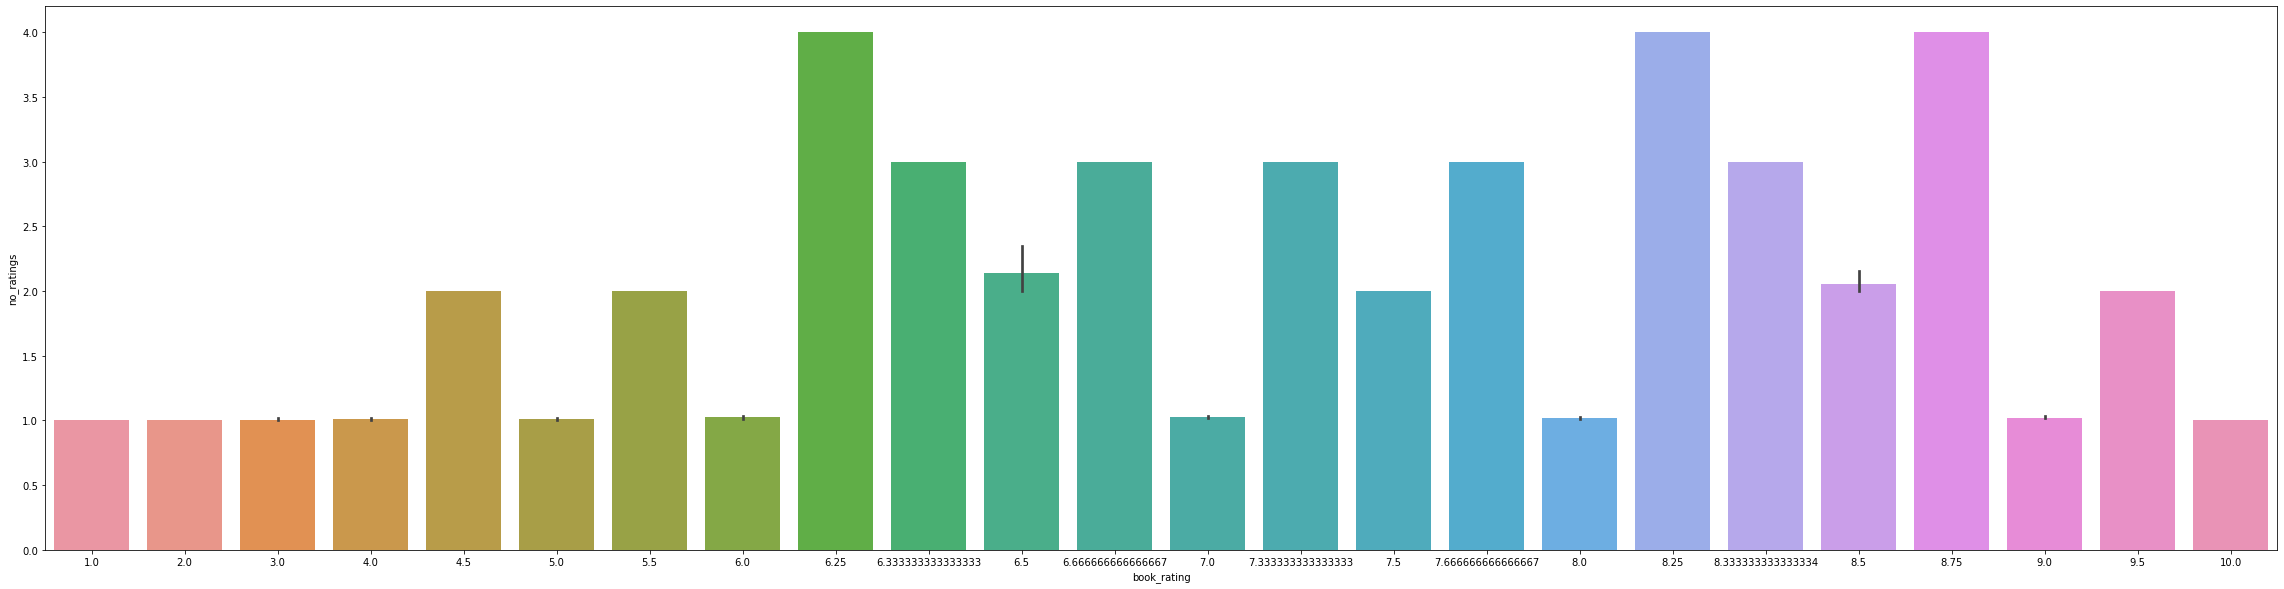

In [11]:
plt.figure(figsize=(40,10))
sns.barplot(data=book_2, y= "no_ratings", x="book_rating")

<AxesSubplot:xlabel='book_rating', ylabel='book_title'>

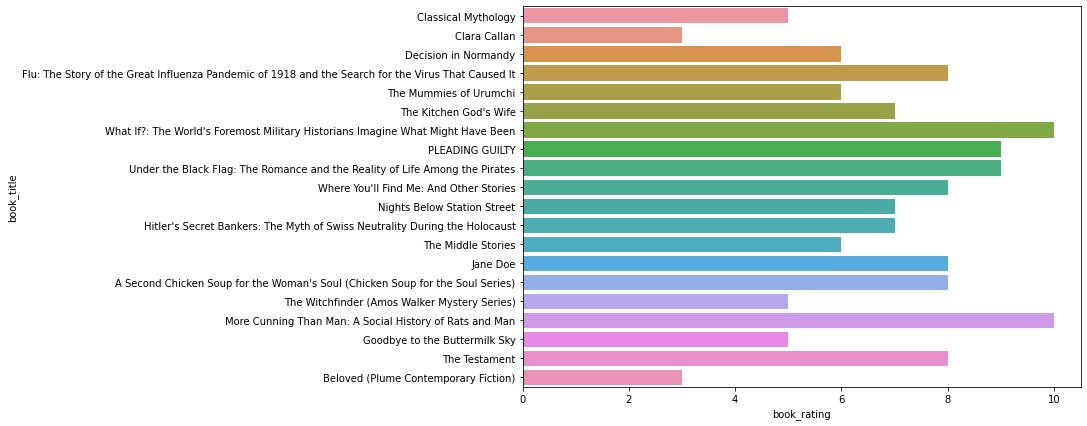

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(y=books.book_title.head(20), x= books.book_rating.head(20))

###   pivot table  user item interaction matrix 

In [13]:
book_rec = books.pivot_table(index="user_id",columns="book_title",values="book_rating").reset_index(drop=True)
book_rec

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
book_rec.index = books.user_id.unique()
book_rec

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
book_rec.fillna(0, inplace=True)

In [16]:
book_rec

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Cosine similarity 

In [17]:
book_cos = 1 - pairwise_distances(book_rec.values, metric= "cosine")
book_cos

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
book_df = pd.DataFrame(book_cos)
book_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
book_df.index = books.user_id.unique()
book_df.columns = books.user_id.unique()
book_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
book_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [21]:
np.fill_diagonal(book_cos,0)

In [66]:
book_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


###   Similar users 

In [23]:
book_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

### Recommending books for similar users 

In [25]:
books[(books['user_id']==276772) | (books['user_id']==1491)]

,user_id,book_title,book_rating
22,276772,If I'd Known Then What I Know Now: Why Not Lea...,7
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
4107,1491,Fifth business,7


###  From the above table we can recommend the second and third books to the user 1491 based on the rating given by the user 276772 

### Recommending books for user1 and user2 

In [61]:
user_1=books[books['user_id']==276754] 

In [62]:
user_2=books[books['user_id']==161677]

In [63]:
user_1.book_title

14    A Second Chicken Soup for the Woman's Soul (Ch...
Name: book_title, dtype: object

In [64]:
user_2.book_title

9188                             The Biggest Pumpkin Ever
9189    The Twelve Dancing Princesses: A Folk Tale fro...
9190                                         Do You Know?
9191               The good-by day (A Little golden book)
9192           Pooh Trick or Treat! (Little Golden Books)
9193                           Cookie Monster/Cookie Tree
9194    My Little Golden Book of Cars and Trucks (Litt...
9195    I Think That It is Wonderful: Featuring Jim He...
9196                                Grover's Own Alphabet
9197     Best Little Word Book Ever! (Little Golden Book)
9198      Busiest Firefighters Ever! (Little Golden Book)
9199                  The Monster at the End of This Book
9200                                             Kat Kong
9201                             IF YOU'RE AFRAID OF DARK
Name: book_title, dtype: object

In [65]:
pd.merge(user_1,user_2,on='book_title',how='outer')

,user_id_x,book_title,book_rating_x,user_id_y,book_rating_y
0,276754.0,A Second Chicken Soup for the Woman's Soul (Ch...,8.0,NaN,NaN
1,NaN,The Biggest Pumpkin Ever,NaN,161677.0,8.0
2,NaN,The Twelve Dancing Princesses: A Folk Tale fro...,NaN,161677.0,9.0
3,NaN,Do You Know?,NaN,161677.0,5.0
4,NaN,The good-by day (A Little golden book),NaN,161677.0,8.0
5,NaN,Pooh Trick or Treat! (Little Golden Books),NaN,161677.0,6.0
6,NaN,Cookie Monster/Cookie Tree,NaN,161677.0,8.0
7,NaN,My Little Golden Book of Cars and Trucks (Litt...,NaN,161677.0,7.0
8,NaN,I Think That It is Wonderful: Featuring Jim He...,NaN,161677.0,8.0
9,NaN,Grover's Own Alphabet,NaN,161677.0,8.0


###   Based on the ratings given by user 161677 we can recommend the book 'Best Little Word Book Ever! (Little Golden Book)'  to the user 276754 because it has the highest rating of 10 